## HR Analytics Project- Understanding the Attrition in HR

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
at = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
at

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
#columns that are Catagorical
at.select_dtypes(include=['object']).columns


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [5]:
#droping not necessary columns and columns with Homogineus Data
at.drop(['Over18' , 'StandardHours' ,'EmployeeCount','EmployeeNumber' ] , inplace=True , axis=1)

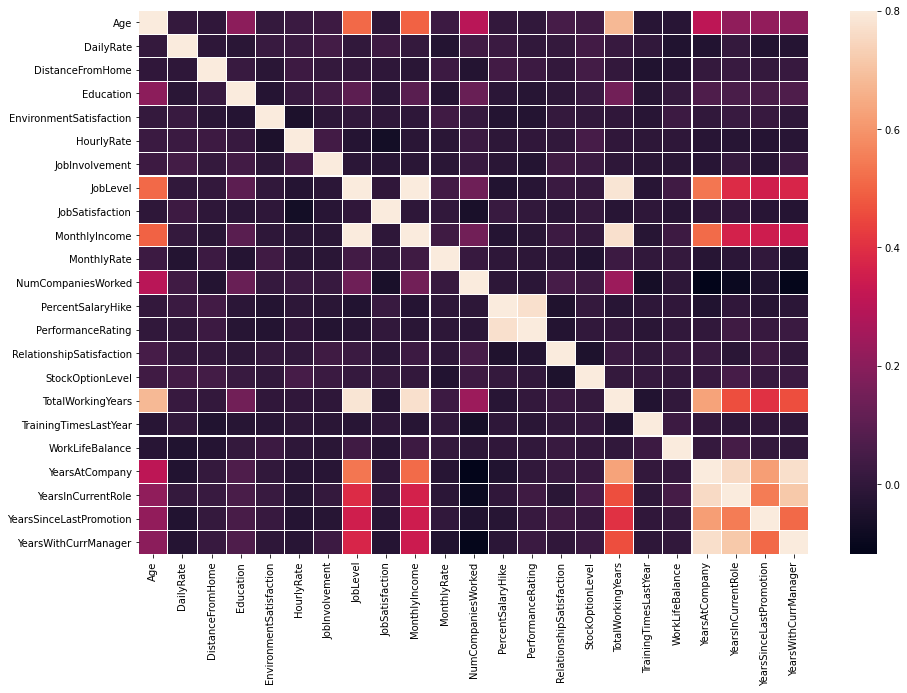

In [11]:
#plotting heat map of the corelation matrix 
plt.figure(figsize=(15,10))
sns.heatmap(at.corr(),linewidth=0.1,vmax=0.8)
plt.show()

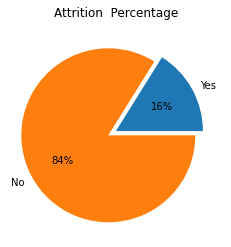

In [12]:
#Checking the Attrition Row 
vals = [at.Attrition[at.Attrition=='Yes'].count() , at.Attrition[at.Attrition=='No'].count()]
label = ["Yes" , "No"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0 , 0.1));
plt.title("Attrition  Percentage");
#Here we can see that the data contains 2 classed they are Yes and No , So here the there only 16% yes Record and 84%No record.
#There is an imbalance between both the class.

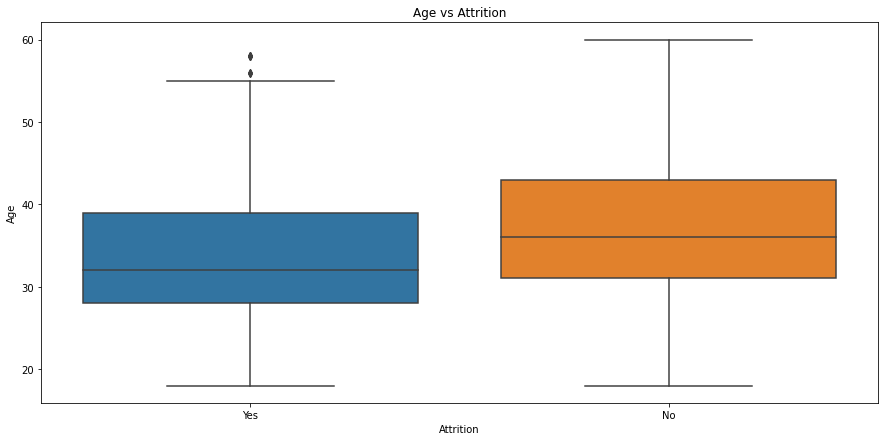

In [22]:
#ploting Age vs Attrition 
plt.figure(figsize=(15,7))
sns.boxplot(y='Age' , x='Attrition' , data=at )
plt.title("Age vs Attrition");

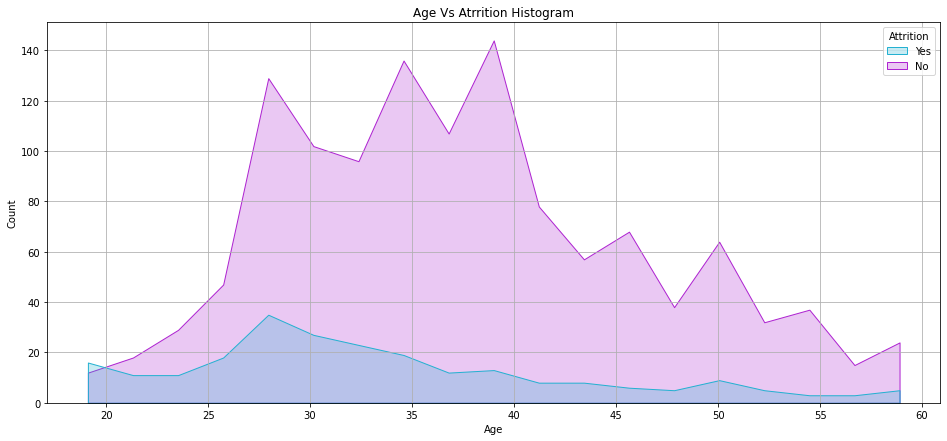

In [27]:
plt.figure(figsize=(16,7))
sns.histplot(x='Age' ,hue='Attrition' , data=at ,element="poly", palette=('#24b1d1', '#ae24d1') );
plt.title("Age Vs Atrrition Histogram")
plt.grid()

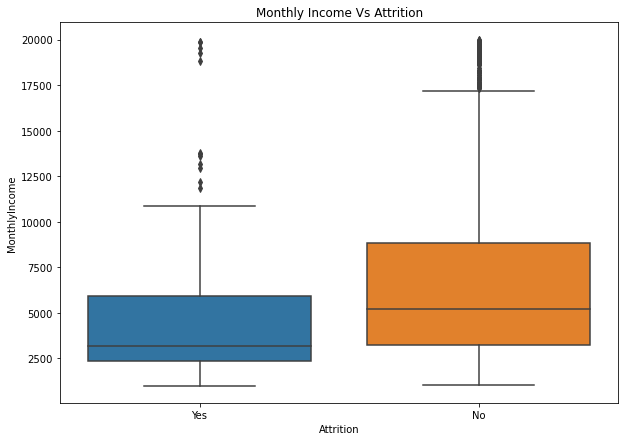

In [32]:
#Attrition and renumeration quality 
#Monthly Income and Attrition Box plot 
#Checking How Attrition is effected by Monthly Income
plt.figure(figsize=(10,7))
sns.boxplot(y = 'MonthlyIncome' , x='Attrition' , data=at)
plt.title("Monthly Income Vs Attrition");
#from the plot it is clearly evident that people with less monthly income have higher tendency to leave

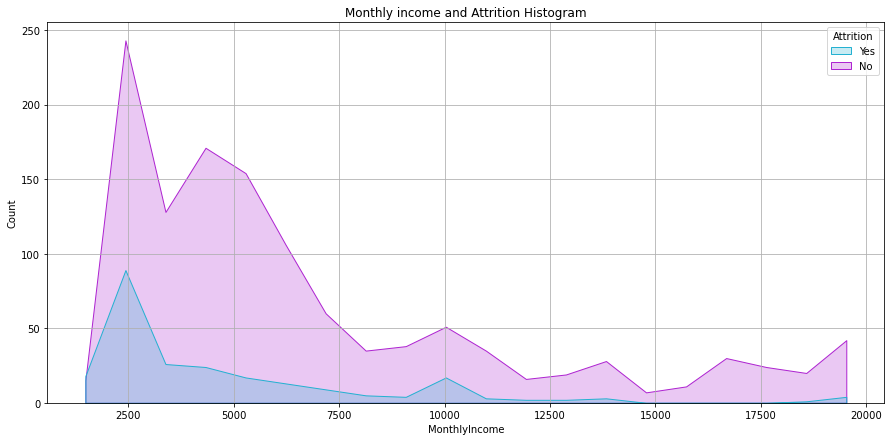

In [31]:
plt.figure(figsize=(15,7))
sns.histplot(x='MonthlyIncome' ,hue='Attrition' , data=at ,element="poly", palette=('#24b1d1', '#ae24d1') )
plt.title("Monthly income and Attrition Histogram")
plt.grid()

<AxesSubplot:title={'center':'Daily Rate Vs Attrition'}, xlabel='Attrition', ylabel='DailyRate'>

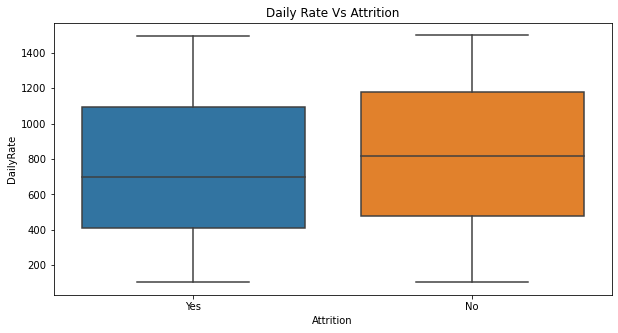

In [11]:
#Checking How Attrition is effected by Daily Rates 
plt.figure(figsize=(10 , 5))
plt.title("Daily Rate Vs Attrition")
sns.boxplot(y = 'DailyRate' , x='Attrition' , data=at)

#Here we can see that people less daily rate have higher chances of Attrition

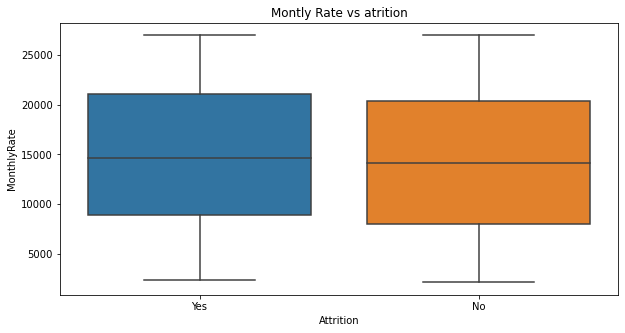

In [12]:
#Checking How Attrition is effected by Monthly Rates 
plt.figure(figsize=(10 , 5))
sns.boxplot(y = 'MonthlyRate' , x='Attrition' , data=at)
plt.title("Montly Rate vs atrition");
#Here we can see that ther is no evident relation between mothly rates and Attrition 

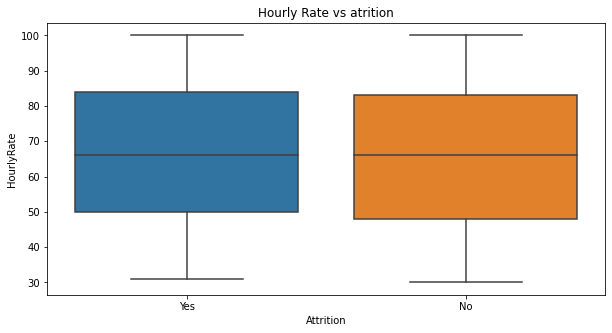

In [13]:
#Checking How Attrition is effected by Hourly rates
plt.figure(figsize=(10 , 5))
sns.boxplot(y = 'HourlyRate' , x='Attrition' , data=at)
plt.title("Hourly Rate vs atrition");
#Here we can see that ther is no evident relation between mothly rates and Attrition 

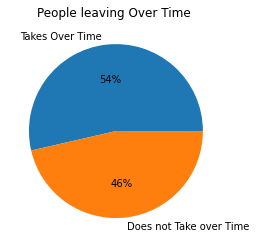

In [14]:
#Relation between People Leaving and OverTime 
values = [at.Attrition[(at.Attrition == 'Yes')&(at.OverTime == 'Yes')].count() ,at.Attrition[(at.Attrition == 'Yes')&(at.OverTime == 'No')].count()]
plt.pie(values , labels=['Takes Over Time ' , 'Does not Take over Time '] , autopct='%1.0f%%' );
plt.title("People leaving Over Time ");
#Here 54% of the people who are leaving are taking over time

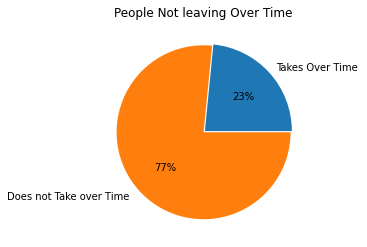

In [38]:
values = [at.Attrition[(at.Attrition == 'No')&(at.OverTime == 'Yes')].count() ,at.Attrition[(at.Attrition == 'No')&(at.OverTime == 'No')].count()]
plt.pie(values , labels=['Takes Over Time ' , 'Does not Take over Time '] , autopct='%1.0f%%' , explode=(0,0.02));
plt.title("People Not leaving Over Time ");
#Here only 23% of the people who are not leaving takes over time 

In [16]:
#Here we can see that percent of people who are taking overtime is more in Attrition yes 

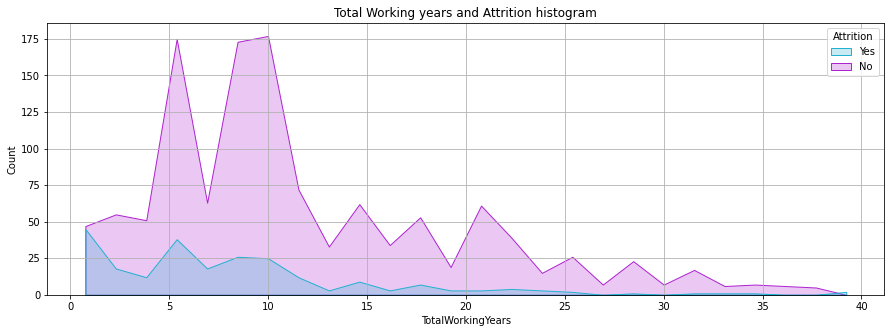

In [39]:
#Total Working years and Attrition histogram
plt.figure(figsize=(15,5))
sns.histplot(x='TotalWorkingYears' ,hue='Attrition' , data=at ,element="poly", palette=('#24b1d1', '#ae24d1'))
plt.title("Total Working years and Attrition histogram")
plt.grid();

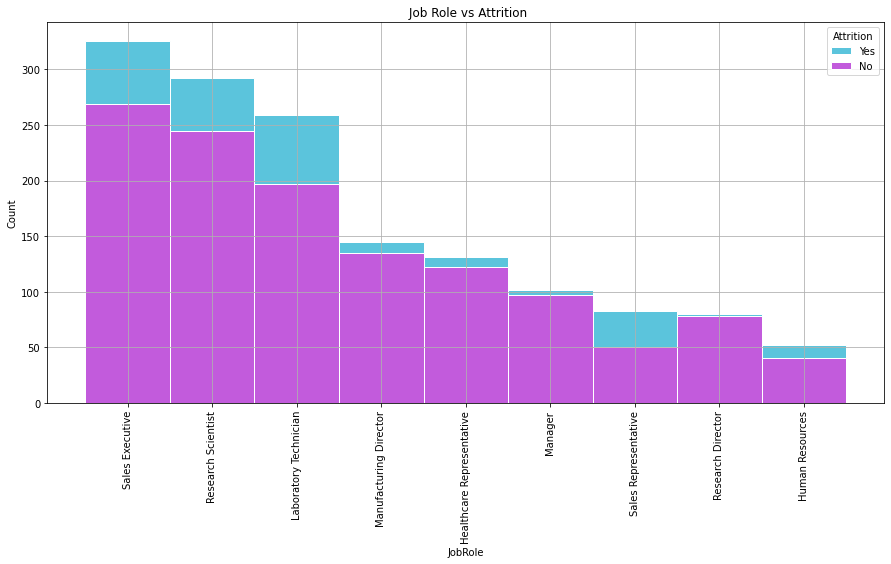

In [41]:
#Years at Company vs Jobrole vs Attrition 
plt.figure(figsize=(15,7))
sns.histplot(x='JobRole' ,hue='Attrition' , data=at , multiple='stack',palette=('#24b1d1', '#ae24d1'), edgecolor='white')
plt.title(" Job Role vs Attrition")
plt.xticks(rotation=90)
plt.grid()
#here we can see the effect of years at company and jobrole on Attrition 

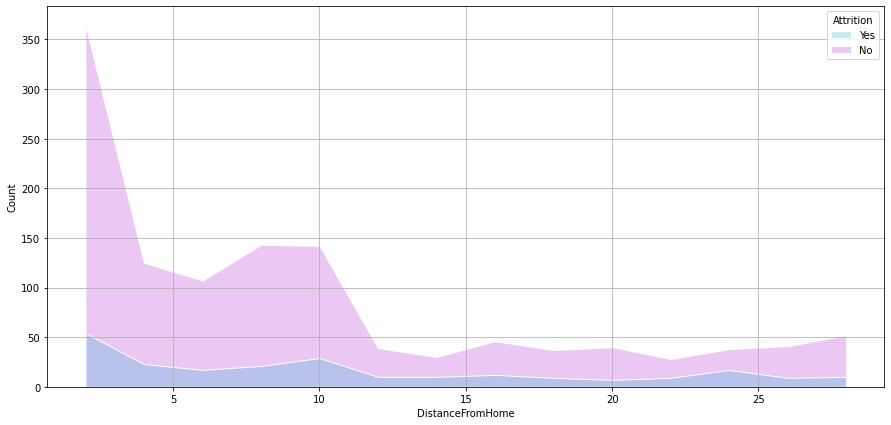

In [42]:
#Here we can see How Distance from home is effecting Attretion 
plt.figure(figsize=(15,7))
sns.histplot(x='DistanceFromHome' ,hue='Attrition' , data=at ,palette=('#24b1d1', '#ae24d1'), element='poly',edgecolor='white')
plt.grid()


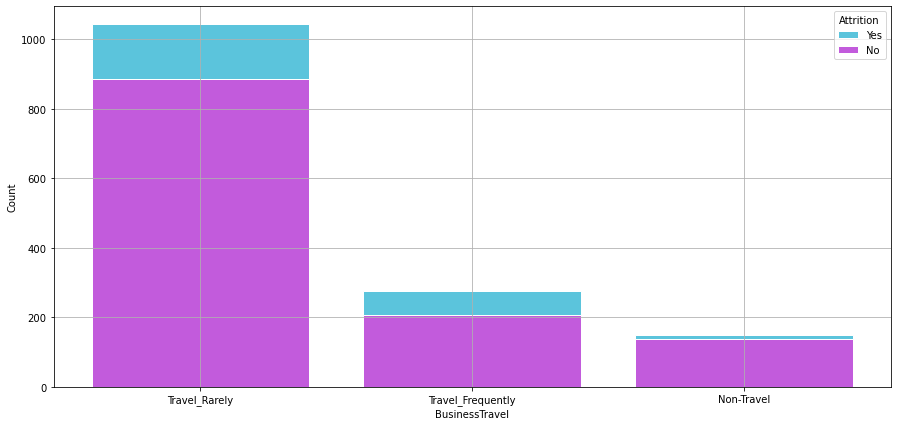

In [43]:
#Here 
plt.figure(figsize=(15 , 7))
sns.histplot(x='BusinessTravel' , hue='Attrition' ,data=at , multiple='stack' ,palette=('#24b1d1', '#ae24d1') , edgecolor='white' , shrink=0.8);
plt.grid()

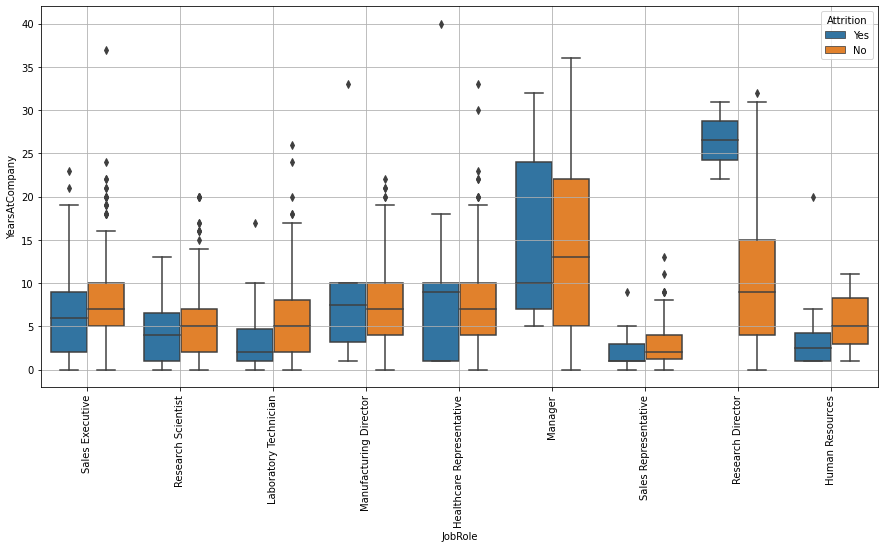

In [45]:

plt.figure(figsize=(15 ,  7))
sns.boxplot(y='YearsAtCompany' , hue='Attrition' , x='JobRole' , data=at)
plt.grid()
plt.xticks(rotation=90);

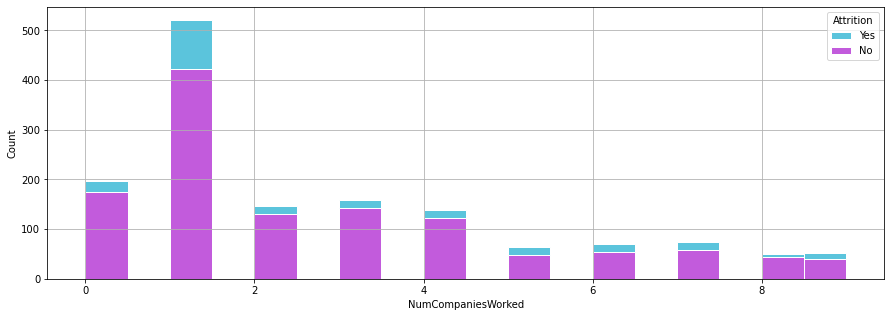

In [46]:
plt.figure(figsize=(15,5))
sns.histplot(x='NumCompaniesWorked' , hue='Attrition' , data=at  ,multiple='stack' , palette=('#24b1d1', '#ae24d1'), edgecolor='white')
plt.grid()
#

In [23]:
#Here from the graphs build above we can see that  who components like Age , Monthly Income ,Distance From Home  , NumCompaniesWorked , 
#job Role, etc effect the Attrition of a company

In [24]:
#Building a Predictive Classification Model

In [50]:
at = pd.read_csv('HR-Employee-Attrition.csv')
#use only when required 
at.Attrition.replace({"Yes":1 , "No":0} , inplace=True)
#labeled to numerical
le=LabelEncoder()
at[at.select_dtypes(include=['object']).columns]  = at[at.select_dtypes(include=['object']).columns].apply(le.fit_transform)
#columns to be dropped
at.drop(['Over18' , 'StandardHours' ,'EmployeeCount','EmployeeNumber' ] , inplace=True , axis=1)

In [51]:
#removing Outliers in monthly income column 
def remove_outliers(df , col , k):
    mean= df[col].mean()
    sd=df[col].std()
    global df1
    final_list = [x for x in df[col] if (x>mean-k*sd)]
    final_list = [x for x in final_list if (x<mean+k*sd)]
    df1 = df.loc[df[col].isin(final_list)];
    return df1
at =remove_outliers(at , 'MonthlyIncome' ,2.5)

In [52]:
#sampling
at_train , at_test = train_test_split(at , test_size=0.2 , random_state=6)
at_train[at_train.Attrition ==1].shape
at_train_x = at_train.drop(['Attrition'] , axis=1 )
at_train_y = at_train.Attrition
at_test_x = at_test.drop(['Attrition'] , axis=1)
at_test_y = at_test.Attrition
#upsampling-class-1
df1 = at_train[at_train.Attrition == 1]
at_train = pd.concat([at_train,df1,df1,df1,df1] , axis=0 )
at_train_x = at_train.drop(['Attrition'] , axis=1 )
at_train_y = at_train.Attrition

In [53]:
#downSamling for Class 0 - Use if Necessary 
df3=  at_train[at_train.Attrition==0].iloc[1:800,:]
df4=  at_train[at_train.Attrition == 1]
at_train = pd.concat([df3 , df4] , axis=0)
at_train_x = at_train.drop(['Attrition'] , axis=1 )
at_train_y = at_train.Attrition

In [54]:
#Random Forest with adaptive Boosting
rfc = RandomForestClassifier(n_estimators=500  , criterion='entropy' , max_depth=3)
adc = AdaBoostClassifier(rfc)
adc.fit(at_train_x , at_train_y)
pred_test_arf = adc.predict(at_test_x)




#confution Matrix
tab_arf = confusion_matrix(pred_test_arf , at_test_y)
print(tab_arf)

#Full Classification Report
report = classification_report(at_test_y , pred_test_arf)
print(report)

#Accuracy 
accuracy_rfa = np.sum(np.diag(tab_arf))*100/np.sum(tab_arf)
print("Accuracy_rf with adb :" , accuracy_rfa)



[[215  19]
 [ 18  30]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       233
           1       0.62      0.61      0.62        49

    accuracy                           0.87       282
   macro avg       0.77      0.77      0.77       282
weighted avg       0.87      0.87      0.87       282

Accuracy_rf with adb : 86.87943262411348


In [55]:
#Checking the Feature Importance 
feature_importance = pd.DataFrame({"Feature " : at_train_x.columns , "Importance": adc.feature_importances_})
feature_importance.sort_values(['Importance'] , ascending=False)

,Feature,Importance
15,MonthlyIncome,0.092559
2,DailyRate,0.071019
16,MonthlyRate,0.060317
0,Age,0.056350
9,HourlyRate,0.047954
12,JobRole,0.042158
4,DistanceFromHome,0.039278
26,YearsAtCompany,0.038556
18,OverTime,0.038278
29,YearsWithCurrManager,0.036536


In [56]:

rfc = RandomForestClassifier(n_estimators=600  , criterion='entropy' , max_depth=5)
rfc.fit(at_train_x , at_train_y)
pred_test_rf = rfc.predict(at_test_x)



tab1 = confusion_matrix(pred_test_rf , at_test_y)
print(tab1)


report = classification_report(at_test_y , pred_test_rf)
print(report)


accuracy_rf = accuracy_score(pred_test_rf , at_test_y)
print("Accuracy_rf :" , accuracy_rf*100)


[[200  15]
 [ 33  34]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       233
           1       0.51      0.69      0.59        49

    accuracy                           0.83       282
   macro avg       0.72      0.78      0.74       282
weighted avg       0.86      0.83      0.84       282

Accuracy_rf : 82.97872340425532


In [57]:
#Checking the Feature Importance 
feature_importance = pd.DataFrame({"Feature " : at_train_x.columns , "Importance": rfc.feature_importances_})
feature_importance.sort_values(['Importance'] , ascending=False)

,Feature,Importance
18,OverTime,0.128116
15,MonthlyIncome,0.106433
22,StockOptionLevel,0.071756
26,YearsAtCompany,0.054401
29,YearsWithCurrManager,0.052977
0,Age,0.050647
23,TotalWorkingYears,0.049198
27,YearsInCurrentRole,0.043150
11,JobLevel,0.042806
2,DailyRate,0.038343


In [58]:
gdc = GradientBoostingClassifier()
gdc.fit(at_train_x , at_train_y)
predict = gdc.predict(at_test_x)


tab_grad= confusion_matrix(predict , at_test_y)
print(tab_grad)


report_grad = classification_report(at_test_y , predict)
print(report_grad)

accuracy_grad = accuracy_score(pred_test_rf , at_test_y)
print("Accuracy gradient: " , accuracy_grad)

[[208  17]
 [ 25  32]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       233
           1       0.56      0.65      0.60        49

    accuracy                           0.85       282
   macro avg       0.74      0.77      0.76       282
weighted avg       0.86      0.85      0.86       282

Accuracy gradient:  0.8297872340425532


In [ ]:
# Best Model is ReRandomForestClassifier Model

import joblib

joblib.dump(accuracy_rfa, 'HR_RFC.obj')